# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/BChristoper/Week-6-Data-Mining/refs/heads/main/diabetes.csv")

df.head()

#Memanggil csv dari web

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

#mendapatkan info mengenai column dan ada berapa banyak data
#disini kita dapat melihat kalau terdapat 9 kolum yaitu Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome dengan jumlah 768 data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
checknull = df.isnull().sum()

checknull

#check ada yang null atau tidak

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:

diabetes_summary = df.describe()

# Menampilkan jumlah statistics
diabetes_summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA

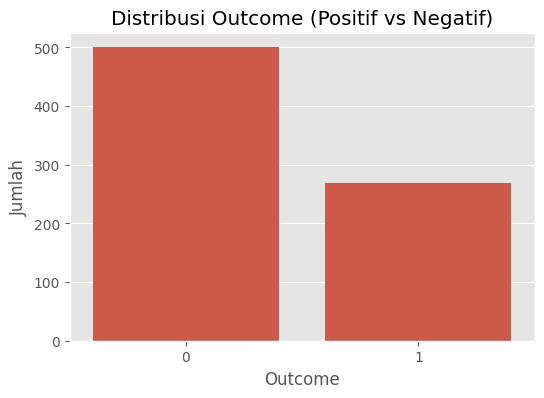

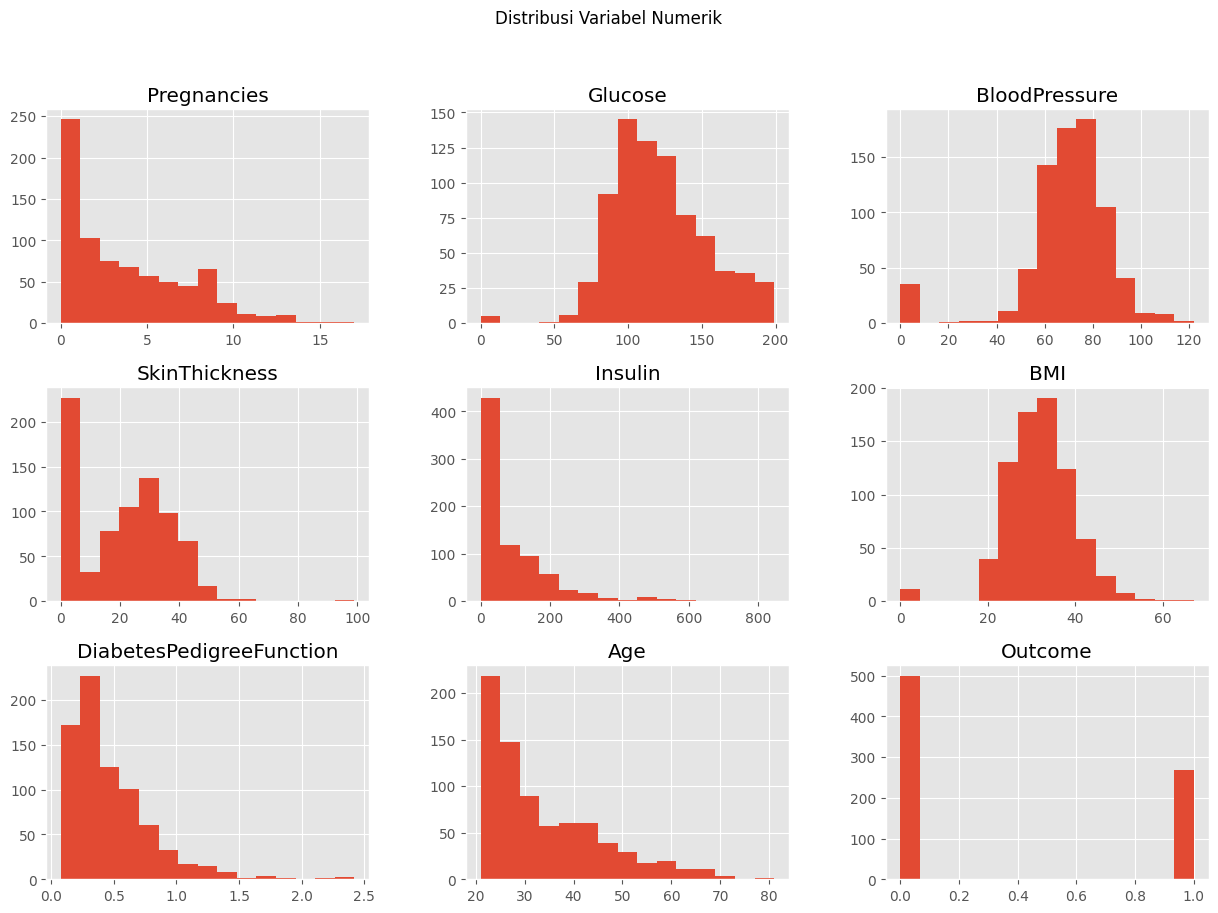

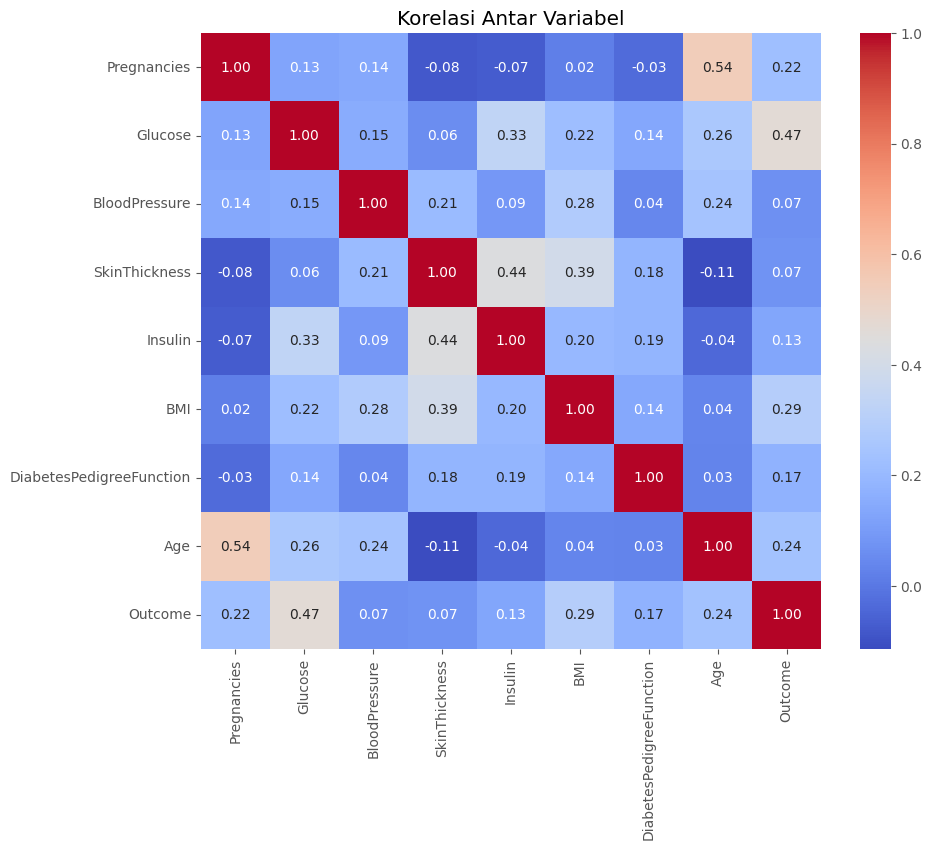

In [6]:
# Mengimpor pustaka visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
plt.style.use('ggplot')

# Visualisasi distribusi Outcome (diabetes positif/negatif)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome')
plt.title('Distribusi Outcome (Positif vs Negatif)')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi distribusi untuk variabel numerik
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

# Korelasi antar variabel
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()


# Split Testing

In [7]:
# Memisahkan fitur dan label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Klasifikasi Decision Tree,KNN dan Random Forest

In [9]:

# Inisialisasi model Decision Tree, KNN, dan Random Forest
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)

# Pelatihan model
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi performa masing-masing model
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Menampilkan hasil evaluasi
import pandas as pd
reports_df = pd.DataFrame({
    "Decision Tree": pd.Series(report_dt['weighted avg']),
    "KNN": pd.Series(report_knn['weighted avg']),
    "Random Forest": pd.Series(report_rf['weighted avg'])
})

reports_df


,Decision Tree,KNN,Random Forest
precision,0.758929,0.671225,0.721939
recall,0.746753,0.662338,0.720779
f1-score,0.750300,0.665794,0.721328
support,154.000000,154.000000,154.000000


# Jadi berdasarkan precisionya Decision Tree adalah yang paling tinggi dengan 0.75